In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.coordinates as coord
from astropy.table import Table
import astropy.units as u
from astropy.io import fits

import gala.coordinates as gc
import gala.potential as gp
import gala.dynamics as gd

In [2]:
plt.style.use('notebook')

In [3]:
coord.galactocentric_frame_defaults.set('v4.0')
gc_frame = coord.Galactocentric()

ham = gp.Hamiltonian(gp.MilkyWayPotential())

In [4]:
tdm = Table(fits.getdata('../data/GSE_DM.fits'))

In [5]:
tdm

X_gal,Y_gal,Z_gal,Vx_gal,Vy_gal,Vz_gal
float32,float32,float32,float32,float32,float32
-641.7788,141.49406,-183.97186,-65.511116,-8.441251,48.682896
47.67679,22.27179,84.15445,69.719215,-61.422874,3.4637668
252.20497,-118.0045,133.71234,66.55214,42.793537,-40.005566
-89.37547,48.454453,-100.51599,-162.35555,-9.586988,-58.69164
-923.2537,311.52368,-207.74084,-52.966892,32.623882,-84.48949
-20.237411,19.343277,-29.004517,-102.44625,71.465645,-40.213554
235.41873,42.179565,3.0851746,-31.852486,78.42692,-69.01593
-218.46303,742.0701,-152.4661,7.211487,118.12472,-11.685992
5.477768,7.0532074,-1.3725739,-247.22664,-12.10263,-118.69226


In [6]:
cg = coord.SkyCoord(x=tdm['X_gal']*u.kpc, y=tdm['Y_gal']*u.kpc, z=tdm['Z_gal']*u.kpc, 
                    v_x=tdm['Vx_gal']*u.km/u.s, v_y=tdm['Vy_gal']*u.km/u.s, v_z=tdm['Vz_gal']*u.km/u.s,
                    frame=gc_frame)

In [7]:
cg

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg): (x, y, z) in kpc
    [(-641.7788 ,  141.49406 , -183.97186  ),
     (  47.67679,   22.27179 ,   84.15445  ),
     ( 252.20497, -118.0045  ,  133.71234  ), ...,
     (-367.6645 ,  490.58997 , -653.6      ),
     ( -84.20186,  148.17033 , -134.00955  ),
     (-150.28542,   81.019455,    1.2360382)]
 (v_x, v_y, v_z) in km / s
    [(-65.511116,  -8.441251,  48.682896 ),
     ( 69.719215, -61.422874,   3.4637668),
     ( 66.55214 ,  42.793537, -40.005566 ), ...,
     (-18.689653, -16.005686, -52.64836  ),
     (-22.450855,  -8.472635,  43.85554  ),
     ( 26.351347, -96.06688 ,  12.600358 )]>

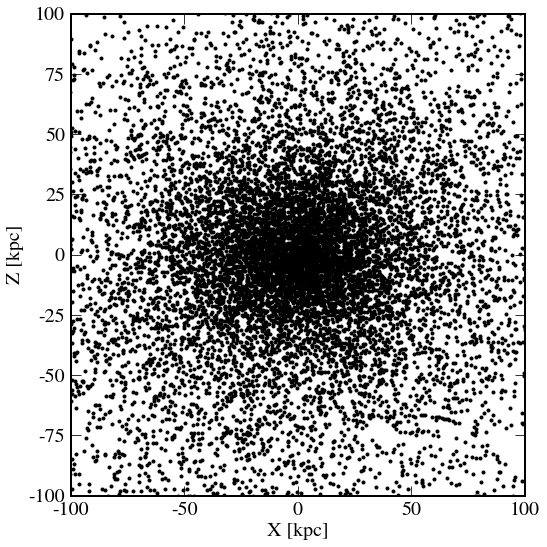

In [8]:
# this plots every 1000th dark matter particle
plt.plot(cg.x[::1000], cg.z[::1000], 'k.')

plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.xlabel('X [kpc]')
plt.ylabel('Z [kpc]')

plt.tight_layout()

In [9]:
# I found a particle that is closer in, but you should explore different starting positions yourself!
w0 = gd.PhaseSpacePosition(cg[285].cartesian)

In [10]:
orbit = ham.integrate_orbit(w0, dt=-1*u.Myr, n_steps=2000)

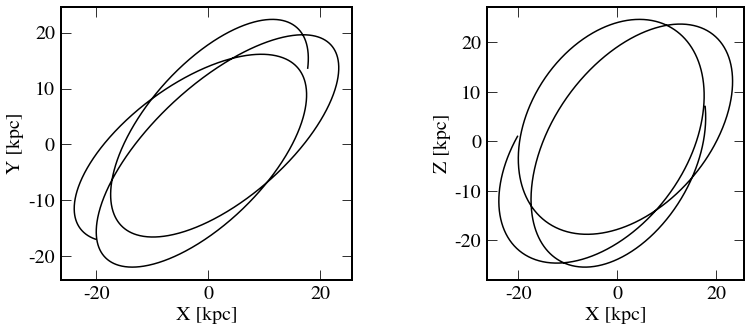

In [11]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

plt.sca(ax[0])
plt.plot(orbit.x, orbit.y, 'k-')

plt.gca().set_aspect('equal')
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')

plt.sca(ax[1])
plt.plot(orbit.x, orbit.z, 'k-')

plt.gca().set_aspect('equal')
plt.xlabel('X [kpc]')
plt.ylabel('Z [kpc]')

plt.tight_layout()